<a href="https://colab.research.google.com/github/Nithish-kumar44/LUNGS_CANCER_PREDICTIONS/blob/main/LUNGS_CANCER_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import data_table
%matplotlib inline

In [3]:
url = "https://raw.githubusercontent.com/mgsalama/Lung-Cancer-Classification/main/survey_lung_cancer.csv"
lung = pd.read_csv(url)

In [4]:
lung.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
lung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
lung.describe(include='all')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
freq,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270
mean,NaN,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,NaN
std,NaN,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,NaN
min,NaN,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,NaN
75%,NaN,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN


In [7]:
lung.columns = lung.columns.str.strip()

In [9]:
lung.replace({2: 0}, inplace=True)
lung['GENDER'] = lung['GENDER'].map({'M': 1, 'F': 0})
lung['LUNG_CANCER'] = lung['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

In [10]:
y = lung['LUNG_CANCER']
X = lung.drop(['LUNG_CANCER'], axis=1)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=2529, stratify=y)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((216, 15), (93, 15), (216,), (93,))

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)

In [18]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [17]:
model.intercept_

array([5.84559891])

In [19]:
model.coef_

array([[ 0.00204077,  0.0500839 , -0.98770008, -1.04743121, -0.40842585,
        -0.87321652, -1.17530842, -1.71489616, -1.70479165, -0.75044532,
        -0.92522248, -1.28332444, -0.16345528, -1.28689583, -0.42771802]])

In [22]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1])

In [24]:
from sklearn.metrics import (confusion_matrix, accuracy_score, classification_report)

In [25]:
print("Accuracy :", accuracy_score(y_test, y_pred))

Accuracy : 0.9032258064516129


In [26]:
print("\nClassification report\n", classification_report(y_test, y_pred))


Classification report
               precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.93      0.96      0.95        81

    accuracy                           0.90        93
   macro avg       0.80      0.73      0.76        93
weighted avg       0.89      0.90      0.90        93



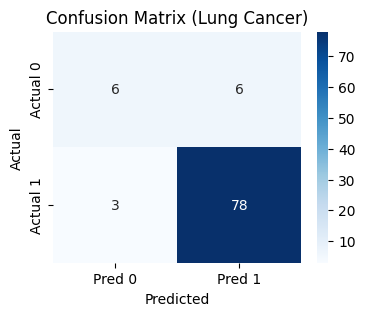

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0','Pred 1'],
            yticklabels=['Actual 0','Actual 1'])
plt.title('Confusion Matrix (Lung Cancer)')
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.show()

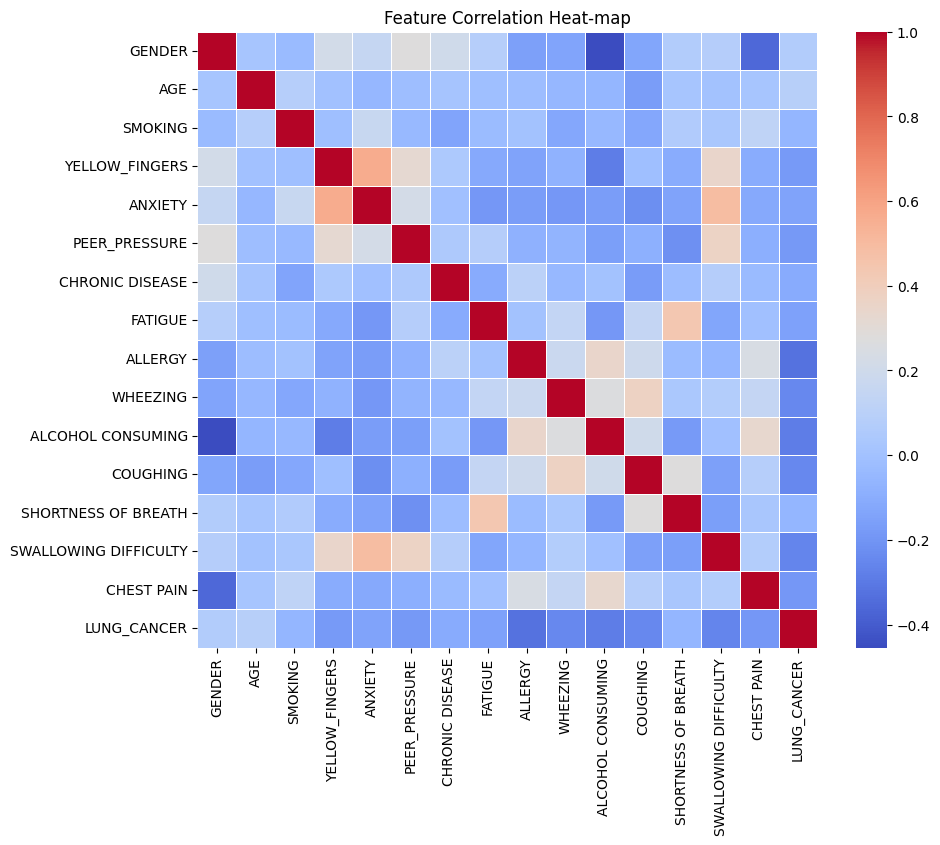

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(lung.corr(), annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Feature Correlation Heat‑map')
plt.show()

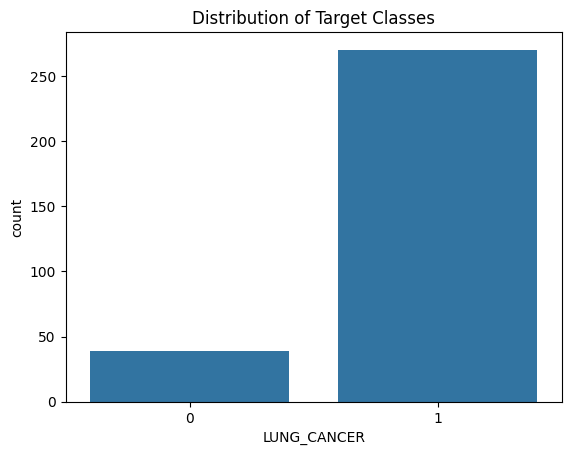

In [31]:
sns.countplot(x='LUNG_CANCER', data=lung)
plt.title('Distribution of Target Classes')
plt.show()